In [1]:
conda install -c anaconda plotly


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
! pip install plotly_express==0.4.0
  




In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np; np.random.seed(1)
from scipy import stats
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import math 
%matplotlib inline

In [4]:

# Country_Level_Info.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv(r'C:\Users\monal\Downloads\CountryLevel_COVID-19_Dataset 1.csv', delimiter=',')
df3 = df1[df1.location != 'World']
df3 = df3[df3.location != 'International']
df2=df1[df1.location == 'World']
df1 = df1[df1.location != 'World']
df1 = df1.drop(columns=['positive_rate', 'population_density', 'cardiovasc_death_rate'])
temp_data = df1
temp_data = temp_data[pd.notnull(temp_data["location"])]
temp_data = temp_data[pd.notnull(temp_data['continent'])]
temp_data = temp_data[pd.notnull(temp_data['new_cases_per_million'])]
temp_data = temp_data[pd.notnull(temp_data['new_tests_per_thousand'])]
temp_data=temp_data.sort_values('total_cases', ascending=False)
temp_data = temp_data.head(500)
temp_data.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,461.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7.919164e+06,69353.416000,157709.718000,972.176000,24171.036798,227.768902,536.248300,3.752378,363.010030,2.942070,6.291868e+08,35.469800,12.650006,8.005374,33250.272806,9.352880
std,5.427643e+06,61543.652361,90735.048556,842.387547,19651.126892,229.419202,411.272562,4.551308,291.046047,2.278153,5.425500e+08,5.284528,4.942222,3.436288,21059.619008,2.325731
min,2.562615e+06,0.000000,45370.000000,0.000000,1876.771000,0.000000,36.217000,0.000000,20.698000,0.397000,6.527351e+07,28.200000,5.989000,3.414000,6426.674000,4.280000
25%,3.553552e+06,27354.500000,80944.000000,461.000000,7282.206000,50.111500,105.598750,0.683500,107.836000,0.796000,3.310026e+08,28.200000,5.989000,3.414000,6426.674000,10.390000
50%,6.706404e+06,47483.500000,140765.500000,737.500000,19401.912500,147.038000,482.303000,2.746000,270.301000,2.690000,3.310026e+08,38.300000,15.413000,9.732000,38605.671000,10.390000
75%,1.006045e+07,78868.250000,205058.750000,1140.250000,40086.760000,340.599250,845.391000,4.119750,624.411000,4.218500,1.380004e+09,38.300000,15.413000,9.732000,54225.446000,10.790000
max,2.593279e+07,300282.000000,436799.000000,4466.000000,78346.183000,1004.507000,1566.847000,26.898000,1036.153000,11.368000,1.380004e+09,42.000000,19.718000,13.079000,54225.446000,10.790000


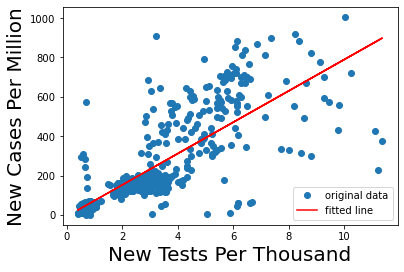

R-squared: 0.625402


In [5]:
plot1_df =temp_data.plot(kind = 'scatter', x = 'new_tests_per_thousand' , y = 'new_cases_per_million', color = 'red')
x= temp_data.new_tests_per_thousand
y= temp_data.new_cases_per_million
res = stats.linregress(x, y)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.xlabel('New Tests Per Thousand', fontsize = 20, color = 'black')
plt.ylabel('New Cases Per Million', fontsize = 20, color = 'black')
plt.legend()

plt.show()
print(f"R-squared: {res.rvalue**2:.6f}")



In [6]:
df1.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,tests_units,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence
0,AFG,Asia,Afghanistan,1/31/2021,55023.0,15.0,2400.0,0.0,1413.443,0.385,...,0.000,NaN,NaN,NaN,38928341.0,18.6,2.581,1.337,1803.987,9.59
1,ALB,Europe,Albania,1/31/2021,78127.0,876.0,1380.0,11.0,27148.169,304.399,...,3.822,119.226,1.093,tests performed,2877800.0,38.0,13.188,8.643,11803.431,10.08
2,DZA,Africa,Algeria,1/31/2021,107339.0,217.0,2891.0,3.0,2447.810,4.949,...,0.068,NaN,NaN,NaN,43851043.0,29.1,6.211,3.857,13913.839,6.73
3,AND,Europe,Andorra,1/31/2021,9937.0,52.0,101.0,0.0,128609.332,673.008,...,0.000,NaN,NaN,people tested,77265.0,NaN,NaN,NaN,NaN,7.97
4,AGO,Africa,Angola,1/31/2021,19796.0,14.0,466.0,2.0,602.320,0.426,...,0.061,NaN,NaN,NaN,32866268.0,16.8,2.405,1.362,5819.495,3.94


In [7]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')


,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence
total_cases,1.000000,0.864714,0.924608,0.718270,0.281743,0.169657,0.303830,0.128563,0.137831,0.082978,0.311170,0.091788,0.088576,0.083997,0.087582,0.043535
new_cases,0.864714,1.000000,0.823503,0.809645,0.250395,0.252804,0.268660,0.168020,0.134005,0.100156,0.270013,0.110568,0.115409,0.111277,0.105878,0.036531
total_deaths,0.924608,0.823503,1.000000,0.767834,0.269864,0.163674,0.406361,0.155018,0.109559,0.072413,0.288364,0.131151,0.131557,0.129624,0.110100,0.051315
new_deaths,0.718270,0.809645,0.767834,1.000000,0.219957,0.203916,0.304428,0.336855,0.081820,0.065019,0.255539,0.131873,0.133341,0.131672,0.104557,0.048296
total_cases_per_million,0.281743,0.250395,0.269864,0.219957,1.000000,0.600743,0.779077,0.430939,0.622625,0.374503,-0.047601,0.281628,0.227471,0.226322,0.329081,0.063095
new_cases_per_million,0.169657,0.252804,0.163674,0.203916,0.600743,1.000000,0.480274,0.524159,0.427253,0.357240,-0.040519,0.280433,0.271555,0.271005,0.229295,0.014713
total_deaths_per_million,0.303830,0.268660,0.406361,0.304428,0.779077,0.480274,1.000000,0.443000,0.299737,0.196757,-0.034143,0.335525,0.350107,0.355219,0.245102,-0.037465
new_deaths_per_million,0.128563,0.168020,0.155018,0.336855,0.430939,0.524159,0.443000,1.000000,0.193806,0.161863,-0.031026,0.259007,0.272870,0.274359,0.124738,-0.012205
total_tests_per_thousand,0.137831,0.134005,0.109559,0.081820,0.622625,0.427253,0.299737,0.193806,1.000000,0.660257,-0.072123,0.232307,0.155737,0.155611,0.452644,0.117844
new_tests_per_thousand,0.082978,0.100156,0.072413,0.065019,0.374503,0.357240,0.196757,0.161863,0.660257,1.000000,-0.060632,0.206968,0.159439,0.159640,0.351720,0.066910


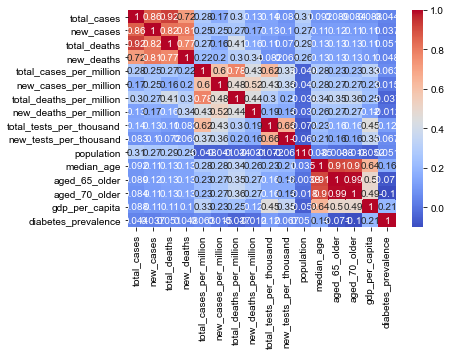

In [8]:

sns.heatmap(df1.corr(),annot = True, cmap = 'coolwarm', annot_kws={'size':10})

sns.set(rc={'figure.figsize':(16,16)})


In [9]:
df1.groupby(['location']).mean().round(decimals=4)

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence
location,,,,,,,,,,,,,,,,
Afghanistan,29602.5102,160.4169,1168.2310,7.5949,760.4360,4.1209,30.0098,0.1951,NaN,NaN,38928341.0,18.6,2.581,1.337,1803.987,9.59
Albania,17676.9210,237.4681,390.9939,4.2202,6142.5120,82.5172,135.8655,1.4663,29.5843,0.3507,2877800.0,38.0,13.188,8.643,11803.431,10.08
Algeria,40338.1374,313.8567,1428.0368,8.8681,919.8900,7.1573,32.5656,0.2022,NaN,NaN,43851043.0,29.1,6.211,3.857,13913.839,6.73
Andorra,2863.2381,29.5744,57.9019,0.3196,37057.3752,382.7658,749.3936,4.1366,1494.9757,NaN,77265.0,NaN,NaN,NaN,NaN,7.97
Angola,6049.3679,62.2516,162.7799,1.5081,184.0601,1.8941,4.9528,0.0458,NaN,NaN,32866268.0,16.8,2.405,1.362,5819.495,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,49419.4136,391.7500,452.3408,3.8232,1737.9207,13.7766,15.9074,0.1345,NaN,NaN,28435943.0,29.0,6.614,3.915,16745.022,6.47
Vietnam,713.0560,4.8453,32.3946,0.1892,7.3255,0.0498,0.3332,0.0019,4.7675,0.0591,97338583.0,32.6,7.150,4.718,6171.884,6.00
Yemen,1507.5589,7.1414,461.8339,2.2202,50.5452,0.2395,15.4843,0.0745,NaN,NaN,29825968.0,20.3,2.922,1.583,1479.147,5.35


In [10]:
df1['date'] = pd.to_datetime(df1['date'],format='%m/%d/%Y')
df2['date'] = pd.to_datetime(df2['date'],format='%m/%d/%Y')

In [11]:
df1['Date_Month'] = df1['date'].map(lambda x: x.strftime('%m'))

df1['Date_Year'] = df1['date'].map(lambda x: x.strftime('%Y'))

df1['Date_Date'] = df1['date'].map(lambda x: x.strftime('%m%d'))

df1['Date_MonthYear'] = df1['date'].map(lambda x: x.strftime('%m/%Y'))

In [12]:
sorted_data=df1.groupby('location').max('total_cases').reset_index()

sorted_data=sorted_data.sort_values('total_cases', ascending=False)

sorted_data = sorted_data.head(20)

sorted_data

,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence
182,United States,26186781.0,300282.0,441324.0,4466.0,79113.509,907.189,1333.294,13.492,895.795,6.600,3.310026e+08,38.3,15.413,9.732,54225.446,10.79
77,India,10757610.0,97894.0,154392.0,2003.0,7795.345,70.937,111.878,1.451,142.455,1.081,1.380004e+09,28.2,5.989,3.414,6426.674,10.39
23,Brazil,9204731.0,87843.0,224504.0,1703.0,43304.275,413.263,1056.194,8.012,30.210,NaN,2.125594e+08,33.5,8.552,5.060,14103.452,8.11
181,United Kingdom,3828183.0,68192.0,106367.0,1826.0,56391.344,1004.507,1566.847,26.898,1036.153,11.368,6.788600e+07,40.8,18.517,12.527,39753.244,4.28
141,Russia,3808348.0,29499.0,72029.0,624.0,26096.290,202.139,493.571,4.276,701.247,4.443,1.459345e+08,39.6,14.178,9.393,24765.954,6.18
60,France,3255920.0,106091.0,76201.0,1438.0,49881.183,1625.330,1167.411,22.030,NaN,11.326,6.527351e+07,42.0,19.718,13.079,38605.671,4.77
162,Spain,2743119.0,93822.0,58319.0,1623.0,58670.340,2006.682,1247.338,34.713,603.746,NaN,4.675478e+07,45.5,19.436,13.799,34272.360,7.17
84,Italy,2553032.0,40902.0,88516.0,993.0,42225.518,676.493,1463.998,16.424,540.287,4.929,6.046183e+07,47.9,23.021,16.240,35220.084,4.78
177,Turkey,2477463.0,44506.0,25993.0,259.0,29375.034,527.703,308.196,3.071,351.337,2.477,8.433907e+07,31.6,8.153,5.061,25129.341,12.13
64,Germany,2225659.0,49044.0,57163.0,1734.0,26564.266,585.363,682.267,20.696,459.175,NaN,8.378394e+07,46.6,21.453,15.957,45229.245,8.31


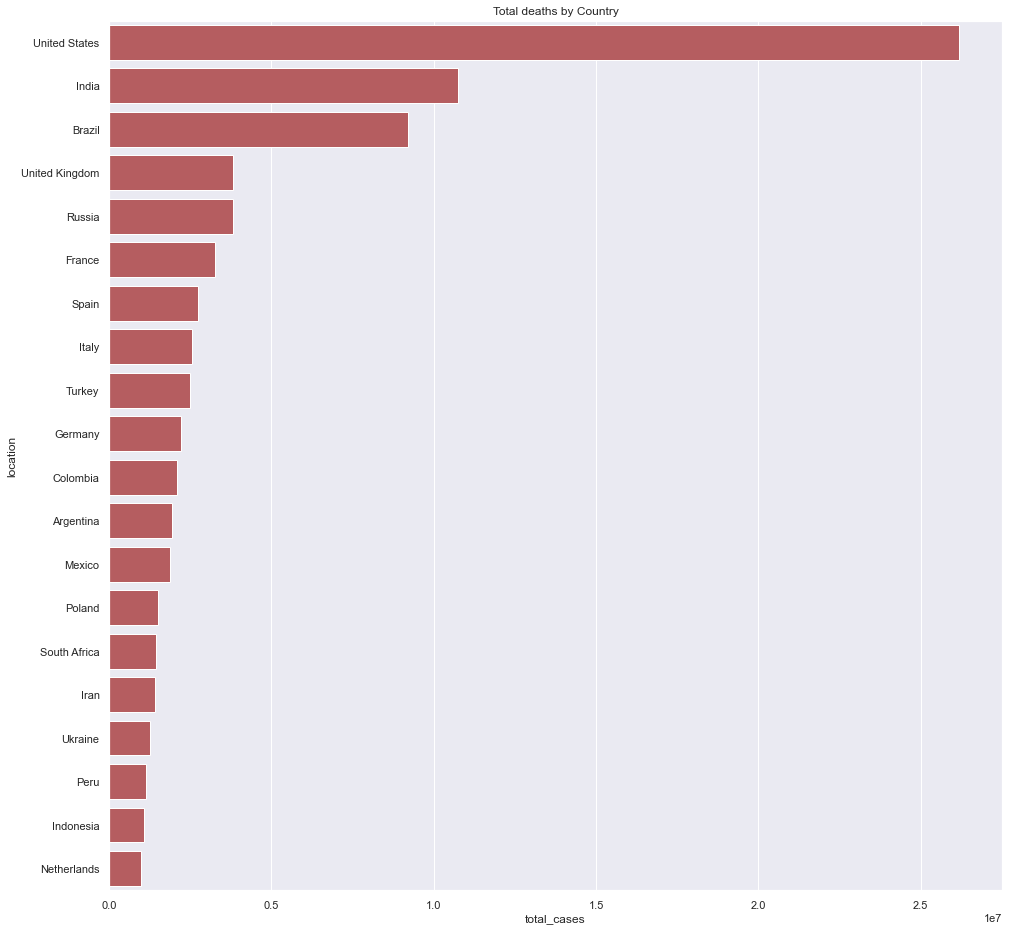

In [13]:

# Add title
plt.title("Total deaths by Country")

#grouped_data=df.groupby('Country_Region').sum().reset_index()

#grouped_data=grouped_data.sort_values('Total_Confirmed_Cases', ascending=False)
#grouped_data
#y_pos = np.arange(len(bars))

g = sns.barplot(x="total_cases", y="location", data=sorted_data,
            color="r",label="Total")
           
    
#label="Total", aspect=.7,hue = "Country_Region",orient="v" , #errcolor='.26'
#sns.barplot(x = grouped_data['Total_Confirmed_Cases'], y=grouped_data)
#df['Total_Confirmed_Cases'].sum()

In [14]:
df3.head(5)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,positive_rate,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence
0,AFG,Asia,Afghanistan,1/31/2021,55023.0,15.0,2400.0,0.0,1413.443,0.385,...,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59
1,ALB,Europe,Albania,1/31/2021,78127.0,876.0,1380.0,11.0,27148.169,304.399,...,0.247,tests performed,2877800.0,104.871,38.0,13.188,8.643,11803.431,304.195,10.08
2,DZA,Africa,Algeria,1/31/2021,107339.0,217.0,2891.0,3.0,2447.810,4.949,...,NaN,NaN,43851043.0,17.348,29.1,6.211,3.857,13913.839,278.364,6.73
3,AND,Europe,Andorra,1/31/2021,9937.0,52.0,101.0,0.0,128609.332,673.008,...,0.085,people tested,77265.0,163.755,NaN,NaN,NaN,NaN,109.135,7.97
4,AGO,Africa,Angola,1/31/2021,19796.0,14.0,466.0,2.0,602.320,0.426,...,NaN,NaN,32866268.0,23.890,16.8,2.405,1.362,5819.495,276.045,3.94


In [25]:

fig = px.sunburst(
    data_frame = df3,
    path = ['continent', 'location'],
    title = "Breakdown of total cases in the world",
    values = 'total_cases',
    hover_data = ['total_cases'],
    
    
    #color = "Country_Region",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    maxdepth = 2,
   
)

fig.update_traces(textinfo='label+percent root')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))


fig.show()

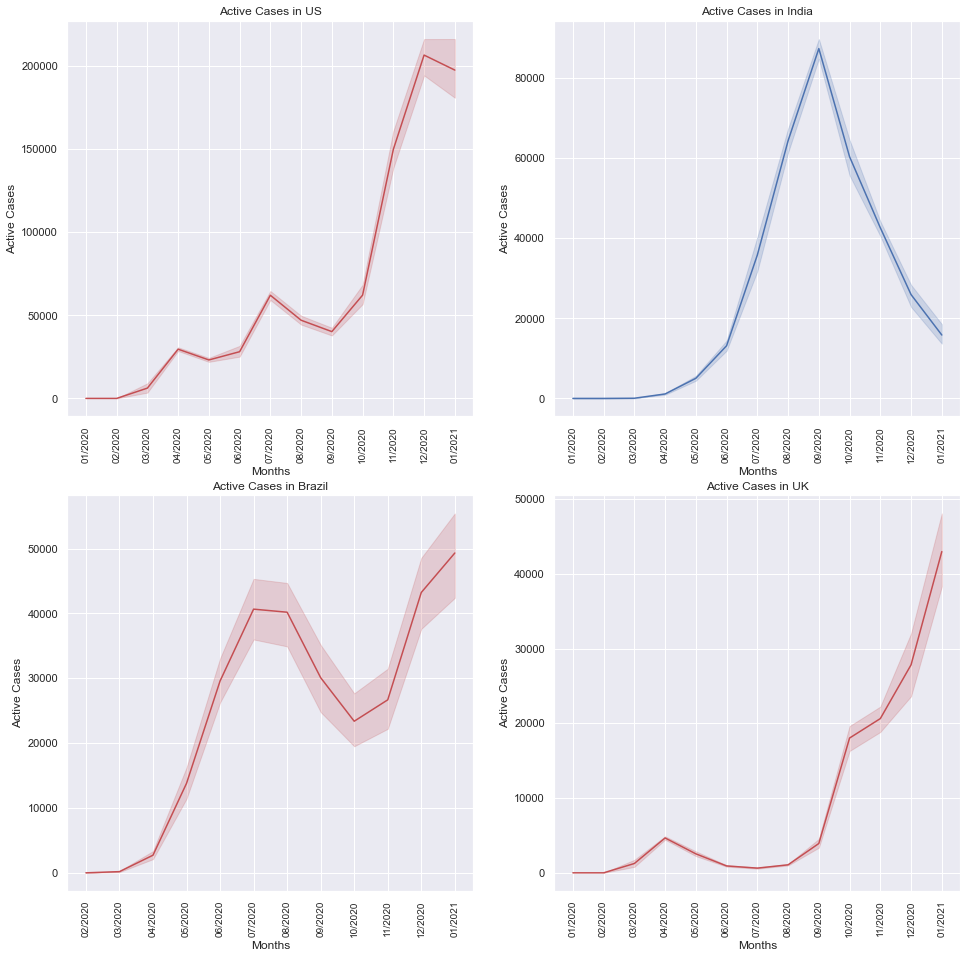

In [23]:
import datetime
temp =df1[df1['location']=='United States']


plt.subplot(2, 2, 1)
ax = sns.lineplot(x=temp.Date_MonthYear, y=temp.new_cases, data=temp, color = 'r')
plt.title("Active Cases in US")
ax.set(xlabel='Months', ylabel='Active Cases')
plt.xticks(rotation = 90 ,fontsize = 10)
plt.gca().invert_xaxis()


import datetime
temp =df1[df1['location']=='India']


plt.subplot(2, 2, 2)
ax = sns.lineplot(x=temp.Date_MonthYear, y=temp.new_cases, data=temp)
plt.title("Active Cases in India")
ax.set(xlabel='Months', ylabel='Active Cases')
plt.xticks(rotation = 90 ,fontsize = 10)
plt.gca().invert_xaxis()


import datetime
temp =df1[df1['location']=='Brazil']


plt.subplot(2, 2, 3)
ax = sns.lineplot(x=temp.Date_MonthYear, y=temp.new_cases, data=temp,color = 'r')
plt.title("Active Cases in Brazil")
ax.set(xlabel='Months', ylabel='Active Cases')
plt.xticks(rotation = 90 ,fontsize = 10)
plt.gca().invert_xaxis()


import datetime
temp =df1[df1['location']=='United Kingdom']


plt.subplot(2, 2, 4)
ax = sns.lineplot(x=temp.Date_MonthYear, y=temp.new_cases, data=temp,color = 'r')
plt.title("Active Cases in UK")
ax.set(xlabel='Months', ylabel='Active Cases')
plt.xticks(rotation = 90 ,fontsize = 10)
plt.gca().invert_xaxis()
plt.show()


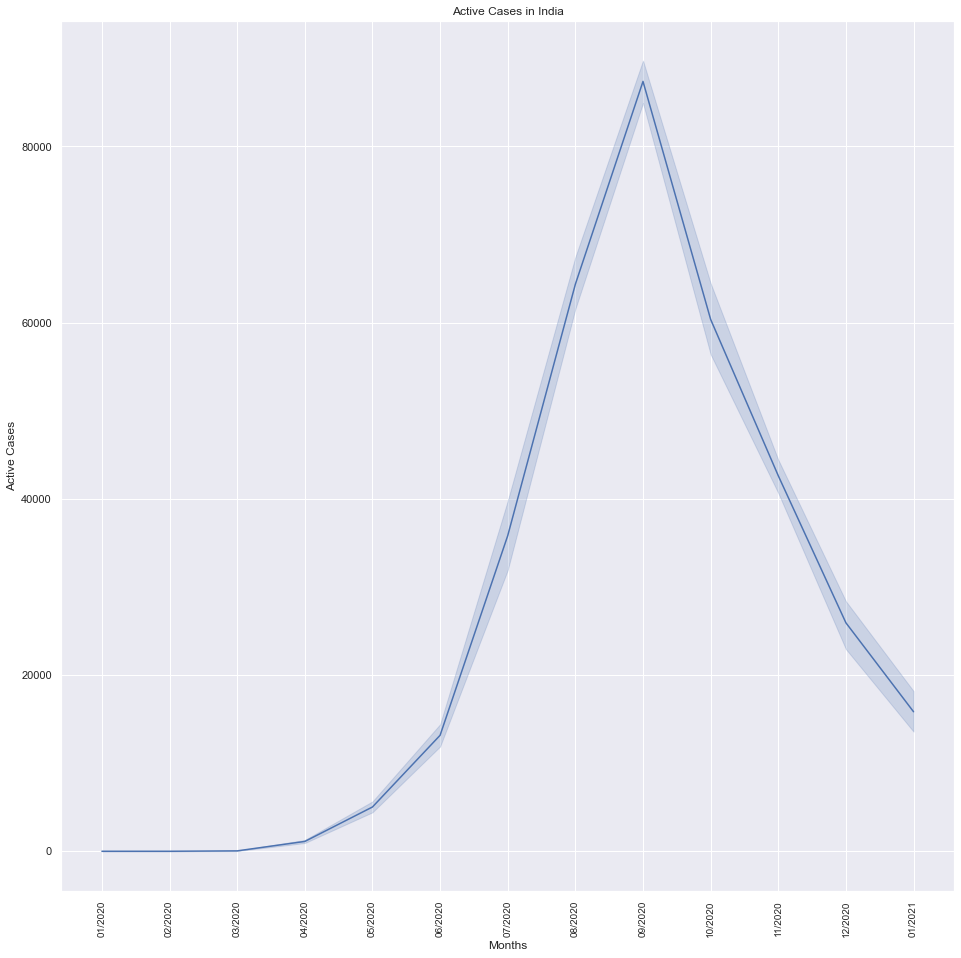

In [20]:
import datetime
temp =df1[df1['location']=='India']

plt.title("Active Cases in India")

ax = sns.lineplot(x=temp.Date_MonthYear, y=temp.new_cases, data=temp)

ax.set(xlabel='Months', ylabel='Active Cases')
plt.xticks(rotation = 90 ,fontsize = 10)
plt.gca().invert_xaxis()
plt.show()

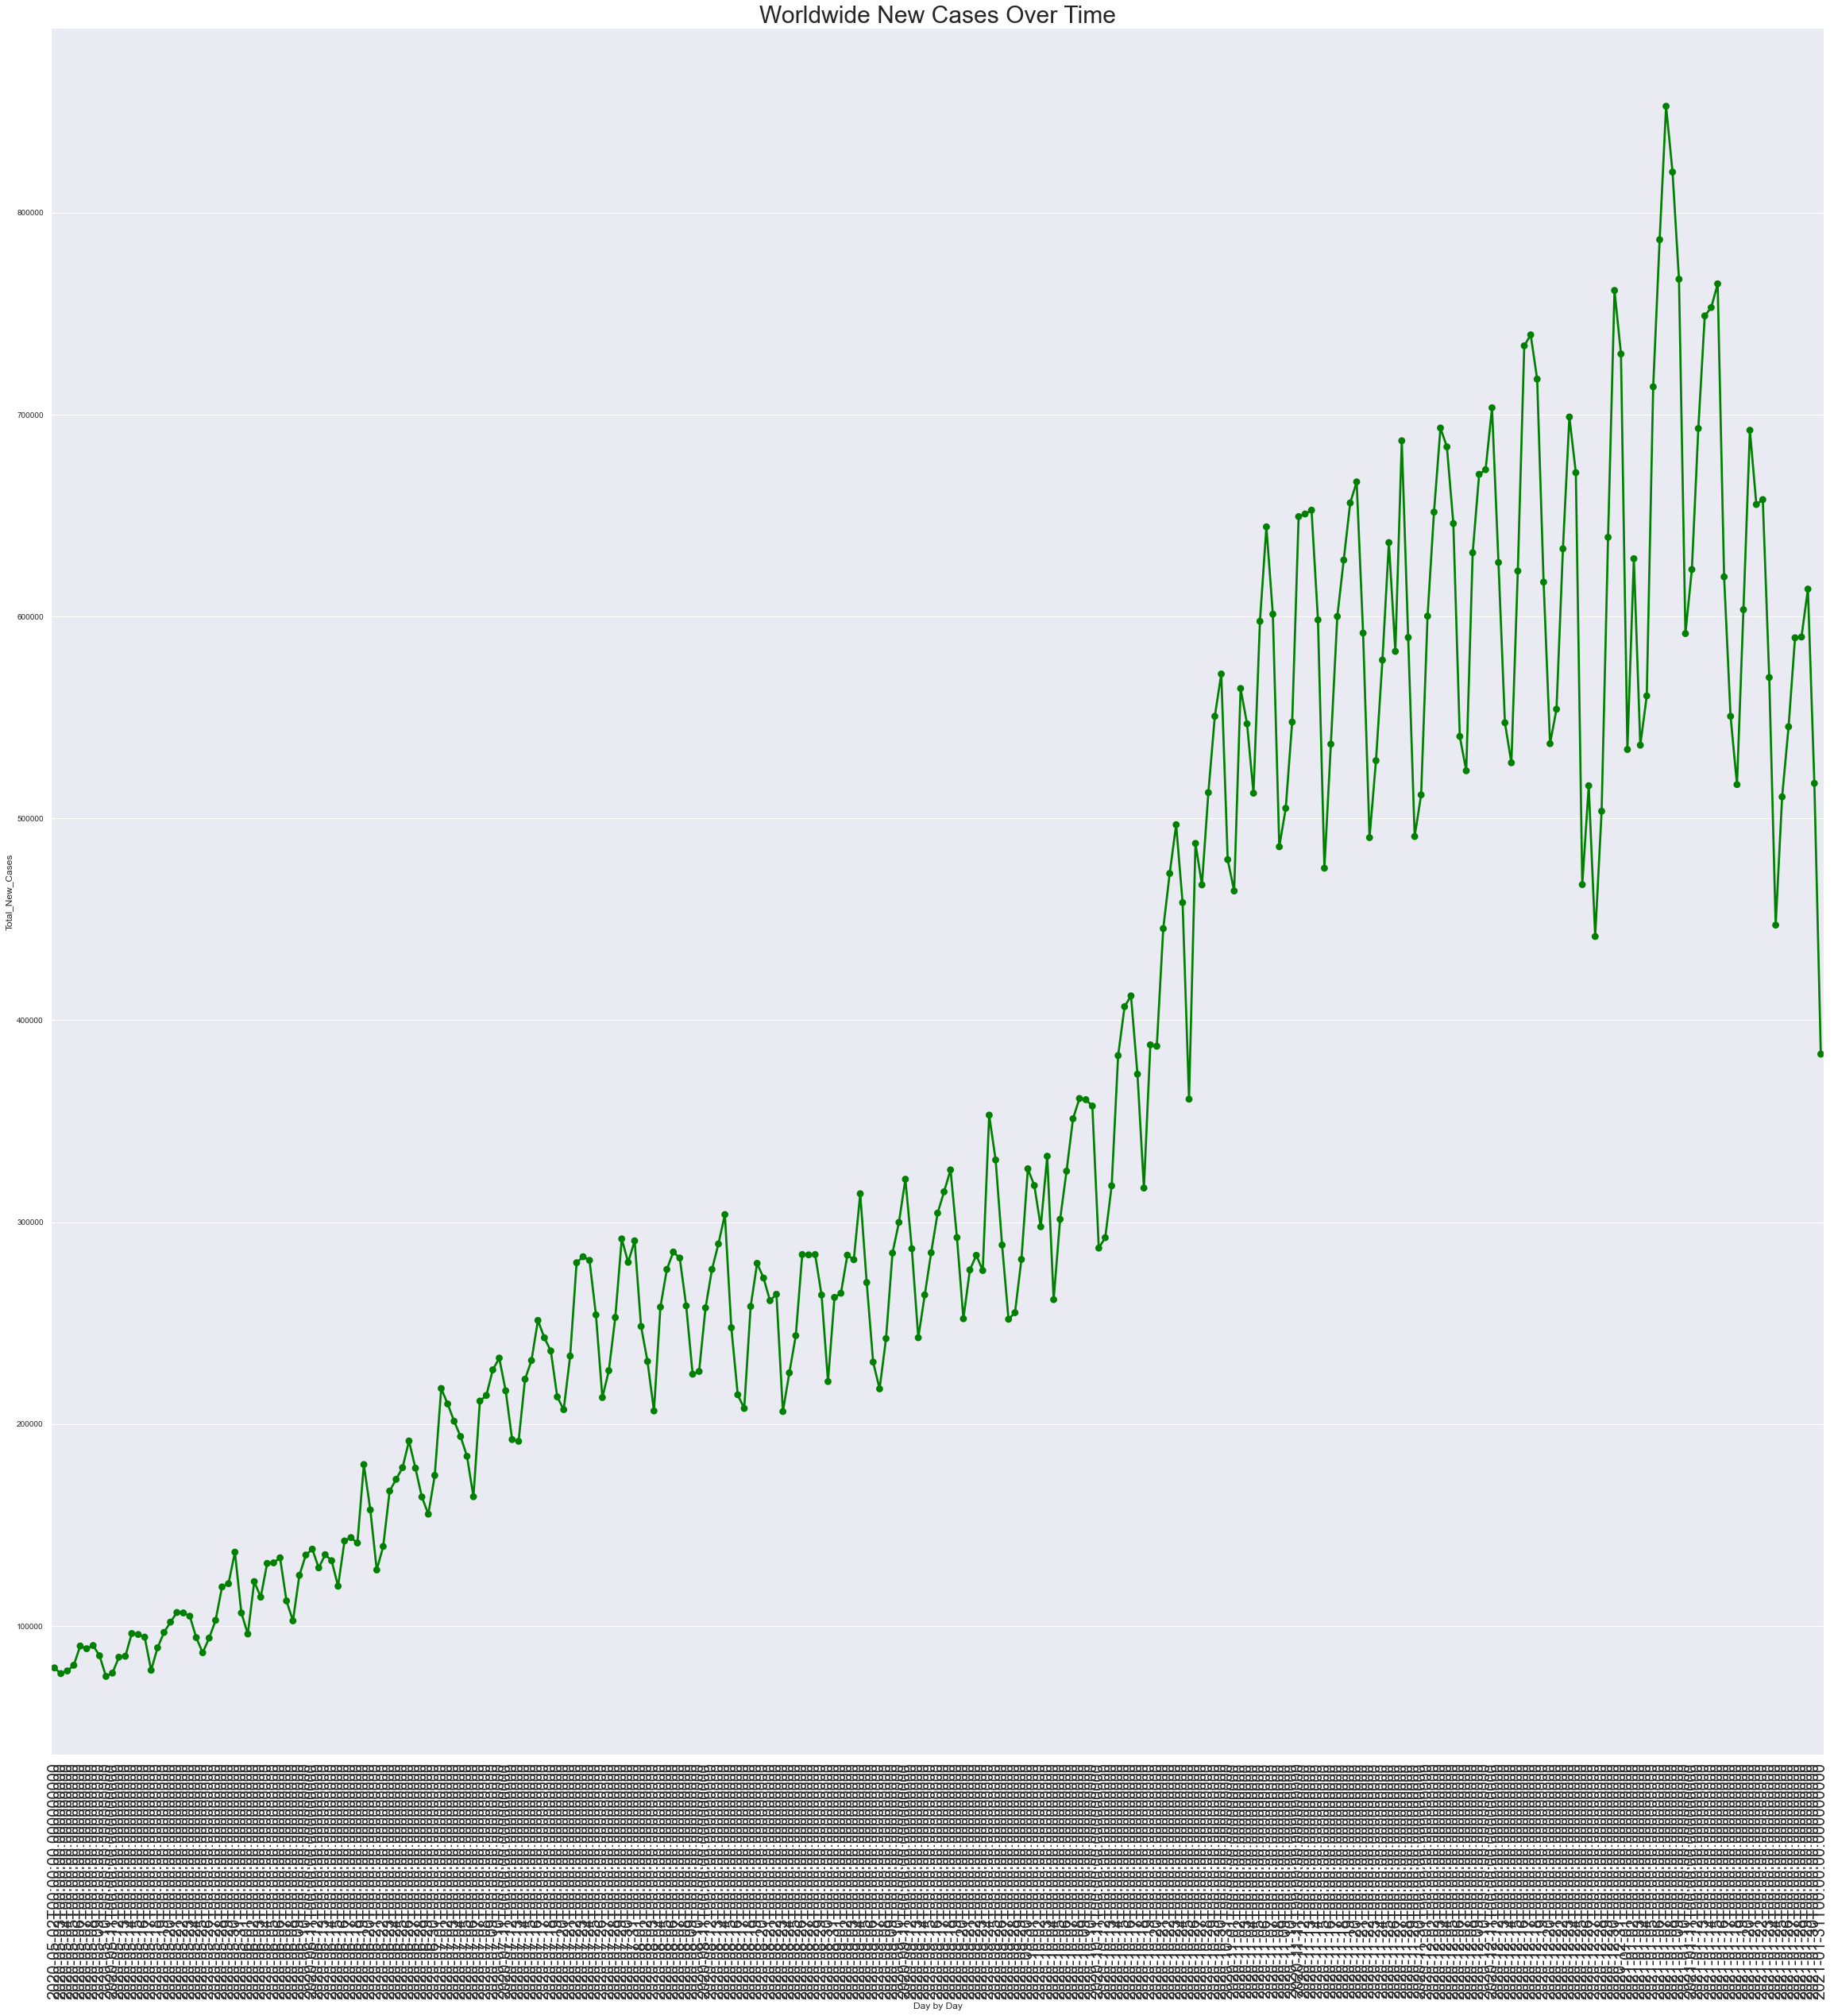

In [21]:
plt.figure(figsize= (40,40))

plt.xticks(rotation = 90 ,fontsize = 20)

plt.yticks(fontsize = 10)

df2 = df2.where(df2['date'] > '05-01-2020')

#plt.xlabel('Day by Day',fontsize = 30)

#plt.ylabel('Total_Confirmed_Cases',fontsize = 30)

plt.title("Worldwide New Cases Over Time" , fontsize = 30)

ax = sns.pointplot( x = df2.date ,y = df2.new_cases, color = 'green' )

ax.set(xlabel='Day by Day', ylabel='Total_New_Cases')
plt.gca().invert_xaxis()
plt.show()

In [23]:
sorted_data1=df1.groupby('location').max('new_deaths').reset_index()

sorted_data_deaths=sorted_data1.sort_values('new_deaths', ascending=False)
sorted_data_death = sorted_data_deaths.head(35)

In [24]:
fig = px.bar(sorted_data_death, x="location", y="new_deaths", 
             text='total_deaths', title = 'Most New Death Cases around the World')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

In [26]:
sorted_data_death2 = sorted_data_deaths.head(20)
x = sorted_data_death2.new_deaths
y=sorted_data_death2.new_cases

fig = px.scatter(sorted_data_death2, x, y, text='location', size ='total_deaths', color = 'location')
fig.update_layout(xaxis_title='New Deaths',
                  yaxis_title='New Cases')
fig.update_traces(textposition='bottom center')

fig.update_layout( 
    height=800,
    title_text='New Covid Cases & New Deaths around the world'
)
fig.add_annotation(x = 2000, y = 100000,
            text="Total Deaths in each country is denoted by the size of the bubble", bgcolor = "pink",
            showarrow=True,
            arrowhead=1)

fig.show()

In [26]:
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])